# Clustering

In this course we go through clustering methods. It is divided into few parts:
1. Distributed clustering (042Clustering_Distributed notebook): 
    - K-means (HCM)
    - Fuzzy clustering (FCM)
    - Possibilistic clustering (PCM)
2. Density-based clustering (043Clustering_Density notebook)
3. Hierarhical clustering (044Clustering_Hierarchical notebook): 
    - agglomerative
    - divisive
4. Quality metrics (045Clustering_Quality notebook)
5. Use case: Image segmentation (046Clustering_ImageSegmentation notebook)

## Idea 

The goal of clustering is to use unsupervised data set, means data set without labels, and find similarities between objects in this data set, and put the most similar to each other together into a cluster. 

Let's imagine that we have a data set with only two features (two axis). The objects does not have any label assigned as in the figure below.
![](./../images/clustering.png)

The clustering training divided the data set into clusters of similar objects. The number of clusters is parametrized in most methods, but there are methods where instead of cluster number, other parameters needs to be set. Such example are density-based methods.

In the figure below, we clustered the data set into two clusters of similar objects.

![](./../images/clustering_done.png)

## Data set

Let's use the data set as in the table below.

|**Aircraft name** | **Distance range (km)** | **Seats count** | **Aircraft type** |
|------------------|-------------------------|-----------------|-------------------|
| Cesna 510 Mustang| 1940                    |             4   | private jet       |
| Falcon 10/100    | 2960                    |             9   | private jet       |
| Hawker 900/900XP | 4630                    |             9   | private jet       |
| ATR 72-600       | 1528                    |            78   | medium size aircraft|
| Bombardier Dash 8 Q400 | 2040              |            90   | medium size aircraft|
| Embraer ERJ145 XR| 3700                    |            50   | medium size aircraft|
| Boeing 747-8     | 14815                   |           467   | jet airliner      |
| A380-800         | 15200                   |           509   | jet airliner      |
| Boeing 787-8     | 15700                   |           290   | jet airliner      |
| Boeing 737-900ER | 6045                    |           215   | jet airliner      | 

To plot the libraries matplotlib is used. Numpy is used for easier matrix manipulation. Pandas is used to display the matrices in a nice looking form in Jupyter.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Now, we are ready to plot:

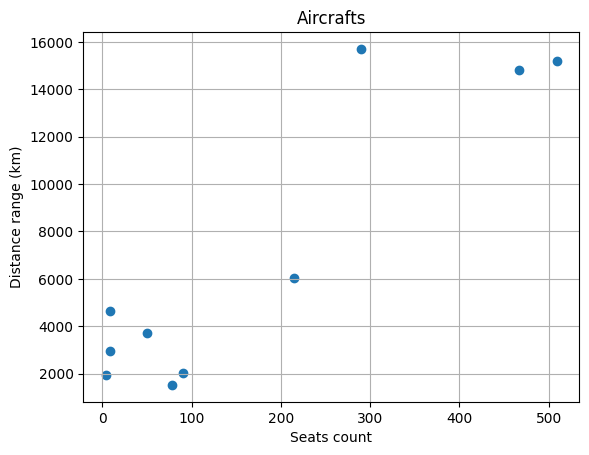

In [11]:
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

Before we go to the next step, we need to normalize our dataset:

In [12]:
train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)

Now, the data is between 0 and 1:

In [13]:
pd.DataFrame(X_norm, columns = ['Seats count','Distance range (km)'])

,Seats count,Distance range (km)
0,0.007859,0.123567
1,0.017682,0.188535
2,0.017682,0.294904
3,0.153242,0.097325
4,0.176817,0.129936
5,0.098232,0.235669
6,0.917485,0.943631
7,1.000000,0.968153
8,0.569745,1.000000
9,0.422397,0.385032


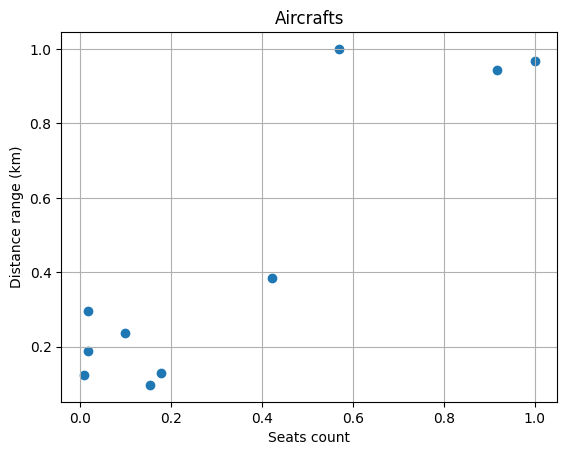

In [14]:
x1 = np.array(X_norm[:,0])
x2 = np.array(X_norm[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

The ``data_set`` variable is used in all further examples. We can store it in this notebook and restore it in each next notebook. This reduce the amount of code that needs to be written.

In [15]:
data_set = X_norm
%store data_set

Stored 'data_set' (ndarray)
